In [1]:
# Firstly, we import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from aggrigator.uncertainty_maps import UncertaintyMap
from aggrigator.methods import AggregationMethods as am
from aggrigator.summary import AggregationSummary
%load_ext autoreload
%autoreload 2

In [22]:
DATASET = "lizard" # "arctique" works as well but needs masks.

# Mask of one lizard image (Sem and Ins)
mask_path = os.path.join(os.getcwd(), "data", f"{DATASET}_uq_masks") 
# Uncertainty maps of one lizard image (Sem and Ins)
unc_map_path = os.path.join(os.getcwd(), "data", f"{DATASET}_uq_maps") 

unc_map_to_mask = lambda uncmap_name: "_".join(uncmap_name.split('_')[:-1]) + ".npy"
unc_map_files = [file for file in os.listdir(unc_map_path)]
mask_files = [unc_map_to_mask(file) for file in os.listdir(unc_map_path)]


arrays_3d = [np.load(os.path.join(unc_map_path, file)) for file in unc_map_files]
masks_3d = [np.load(os.path.join(mask_path, file)) for file in mask_files]

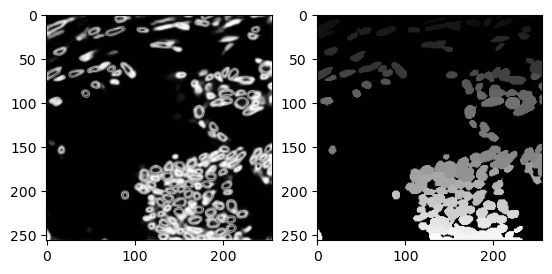

In [23]:
# Plot exampeles of heatmap and mask
IDX = 2
SLICE = 105

array = arrays_3d[IDX][SLICE,:,:]
mask = masks_3d[IDX][SLICE,:,:]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(array, cmap='gray')
ax[1].imshow(mask, cmap='gray')

In [24]:
arrays = [arrays_3d[idx][slice_idx,:,:] for idx in range(len(arrays_3d)) for slice_idx in range(arrays_3d[idx].shape[0])]
masks = [masks_3d[idx][slice_idx,:,:] for idx in range(len(masks_3d)) for slice_idx in range(masks_3d[idx].shape[0])]

In [30]:
focus_strategy_list = [
    (am.mean, None),
    (am.above_quantile_mean, 0.3),
    (am.above_quantile_mean, 0.5),
    (am.above_quantile_mean, 0.7),
    (am.above_quantile_mean, 0.9),
    (am.above_quantile_mean, 0.95),
    (am.above_quantile_mean_fg_ratio, None),
    (am.above_threshold_mean, 0.8),
]


# Get lizard dataset
lizard_maps = [UncertaintyMap(array=array, mask=mask, name=name) for array, mask, name in zip(arrays, masks, unc_map_files)]
lizard_summary = AggregationSummary(focus_strategy_list, name=f"AQA_overview", num_cpus=12)
lizard_df = lizard_summary.apply_methods(lizard_maps, save_to_excel=False, do_plot=False, max_value=1.0)


Using 8 CPUs.


In [31]:
lizard_df

,Name,instance_noise_0_LizardData_0_00_dropout_au.npy,instance_noise_0_LizardData_0_00_dropout_eu.npy,instance_noise_0_LizardData_0_00_dropout_pu.npy,instance_noise_0_LizardData_0_00_ensemble_au.npy,instance_noise_0_LizardData_0_00_ensemble_eu.npy,instance_noise_0_LizardData_0_00_ensemble_pu.npy,instance_noise_0_LizardData_0_00_softmax_pu.npy,instance_noise_0_LizardData_0_00_tta_au.npy,instance_noise_0_LizardData_0_00_tta_eu.npy,...,semantic_noise_0_LizardData_0_00_dropout_au.npy,semantic_noise_0_LizardData_0_00_dropout_eu.npy,semantic_noise_0_LizardData_0_00_dropout_pu.npy,semantic_noise_0_LizardData_0_00_ensemble_au.npy,semantic_noise_0_LizardData_0_00_ensemble_eu.npy,semantic_noise_0_LizardData_0_00_ensemble_pu.npy,semantic_noise_0_LizardData_0_00_softmax_pu.npy,semantic_noise_0_LizardData_0_00_tta_au.npy,semantic_noise_0_LizardData_0_00_tta_eu.npy,semantic_noise_0_LizardData_0_00_tta_pu.npy
0,mean,0.107028,0.207974,0.019499,0.128666,0.034069,0.143730,0.247795,0.211439,0.228095,...,0.261834,0.211709,0.251377,0.227530,0.242043,0.238001,0.150799,0.009578,0.229789,0.318361
1,above_quantile_mean_0.3,0.152742,0.296703,0.025342,0.183605,0.048497,0.205290,0.353281,0.301746,0.324819,...,0.373204,0.301536,0.358372,0.324488,0.345618,0.339045,0.215348,0.013461,0.327829,0.454522
2,above_quantile_mean_0.5,0.213344,0.411305,0.031928,0.256211,0.067502,0.287164,0.487132,0.420000,0.445582,...,0.512387,0.416715,0.494800,0.446635,0.481340,0.465195,0.300981,0.018395,0.454306,0.625367
3,above_quantile_mean_0.7,0.352405,0.617280,0.044563,0.420052,0.110977,0.470630,0.687306,0.639221,0.636120,...,0.706176,0.617414,0.703369,0.652770,0.712427,0.663072,0.485679,0.029584,0.663606,0.813030
4,above_quantile_mean_0.9,0.758018,0.842585,0.081805,0.771866,0.310245,0.780656,0.856674,0.855896,0.818016,...,0.876297,0.819778,0.875249,0.841454,0.886751,0.854426,0.762602,0.084066,0.857519,0.933881
5,above_quantile_mean_0.95,0.865717,0.915209,0.110531,0.861779,0.532763,0.864045,0.914790,0.925388,0.889594,...,0.933038,0.893385,0.929649,0.902803,0.935938,0.915516,0.843395,0.162939,0.920020,0.963423
6,above_quantile_mean_fg_ratio,0.651554,0.604239,1.000000,0.604061,0.628276,0.624022,0.631010,0.623117,0.587133,...,0.639257,0.624344,0.625240,0.625916,0.668443,0.594794,0.586329,0.651940,0.623430,0.701432
7,above_threshold_mean_0.8,0.892645,0.896028,1.000000,0.887676,0.887241,0.892766,0.886437,0.898303,0.886681,...,0.893932,0.888722,0.889854,0.884094,0.889250,0.888704,0.886563,0.917148,0.891224,0.895857


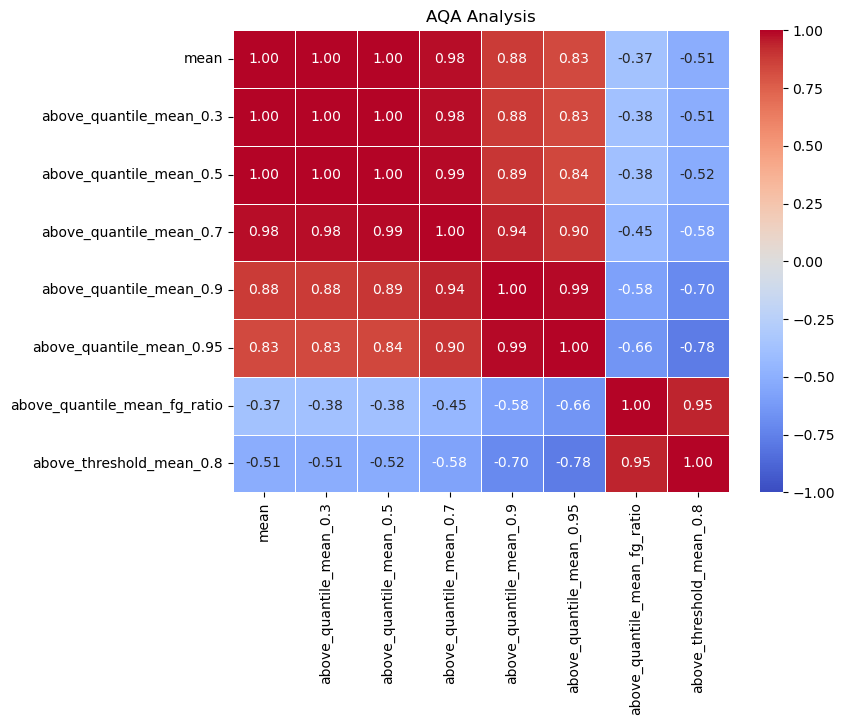

,0,1,2,3,4,5,6,7
0,1.000000,0.999980,0.999112,0.981198,0.879108,0.828409,-0.372342,-0.509530
1,0.999980,1.000000,0.999332,0.982092,0.880997,0.830683,-0.375811,-0.513138
2,0.999112,0.999332,1.000000,0.987376,0.890780,0.841342,-0.384928,-0.523111
3,0.981198,0.982092,0.987376,1.000000,0.940322,0.897651,-0.448667,-0.577943
4,0.879108,0.880997,0.890780,0.940322,1.000000,0.988139,-0.581913,-0.703902
5,0.828409,0.830683,0.841342,0.897651,0.988139,1.000000,-0.655471,-0.778035
6,-0.372342,-0.375811,-0.384928,-0.448667,-0.581913,-0.655471,1.000000,0.945070
7,-0.509530,-0.513138,-0.523111,-0.577943,-0.703902,-0.778035,0.945070,1.000000


In [32]:

def plot_correlation_matrix(df, title):
    """
    Computes and plots the correlation matrix of methods across columns.

    :param df: pandas DataFrame where each row represents a method and columns represent features.
    """
    # Compute the correlation matrix (rows as methods, columns as features)
    corr_matrix = df[df.columns.tolist()[1:]].T.corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    #sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, 
                xticklabels=df["Name"].tolist(), yticklabels=df["Name"].tolist(), vmin=-1, vmax=1)  # Show row names

    plt.title(title)
    plt.show()
    return corr_matrix

plot_correlation_matrix(lizard_df, "AQA Analysis")

In [138]:
def get_slice_arrays(slice, dataset):
    # Load arrays
    path = os.path.join(os.getcwd(), "data", dataset)
    files = os.listdir(path)
    arrays = [np.load(os.path.join(path, file)) for file in files] # 3D arrays, shape (50,512,512)
    if len(arrays[0].shape) == 3:
        arrays = [array[slice,:,:] for array in arrays]
    arrays = [np.where(array < 0, 0, array) for array in arrays]
    return arrays, files

def plot_correlation_matrix(df, title):
    """
    Computes and plots the correlation matrix of methods across columns.

    :param df: pandas DataFrame where each row represents a method and columns represent features.
    """
    # Compute the correlation matrix (rows as methods, columns as features)
    corr_matrix = df[df.columns.tolist()[1:]].T.corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    #sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, 
                xticklabels=df["Name"].tolist(), yticklabels=df["Name"].tolist(), vmin=-1, vmax=1)  # Show row names

    plt.title(title)
    plt.show()
    return corr_matrix

In [139]:
focus_strategy_list = [
    (am.mean, None),
    (am.above_threshold_mean, 0.3),
    (am.above_threshold_mean, 0.5),
    (am.above_threshold_mean, 0.7),
    (am.above_threshold_mean, 0.9),
    (am.above_threshold_mean, 0.95),
    (am.above_quantile_mean, 0.3),
    (am.above_quantile_mean, 0.5),
    (am.above_quantile_mean, 0.7),
    (am.above_quantile_mean, 0.9),
    (am.above_quantile_mean, 0.95),
    (am.patch_aggregation, 10), 
    (am.patch_aggregation, 20),
    (am.patch_aggregation, 40),
    (am.patch_aggregation, 80),
    (am.patch_aggregation, 100),
    (am.patch_aggregation, 200),
]


# Get lizard dataset
lizard_arrays, lizard_filenames = get_slice_arrays(slice=25, dataset="lizard_uq_maps")
lizard_maps = [UncertaintyMap(array=array, mask=None, name=name) for array, name in zip(lizard_arrays, lizard_filenames)]
lizard_summary = AggregationSummary(focus_strategy_list, name=f"lizard_overview", num_cpus=12)
lizard_df = lizard_summary.apply_methods(lizard_maps, save_to_excel=False, do_plot=False, max_value=1.0)

# Get crops dataset
crops_arrays, crops_filenames = get_slice_arrays(slice=25, dataset="crops_uq_maps")
crops_maps = [UncertaintyMap(array=array, mask=None, name=name) for array, name in zip(crops_arrays, crops_filenames)]
crops_summary = AggregationSummary(focus_strategy_list, name=f"lizard_overview", num_cpus=12)
crops_df = crops_summary.apply_methods(crops_maps, save_to_excel=False, do_plot=False, max_value=1.0)

# Get arctique dataset
arctique_arrays, arctique_filenames = get_slice_arrays(slice=25, dataset="arctique_uq_maps")
arctique_maps = [UncertaintyMap(array=array, mask=None, name=name) for array, name in zip(arctique_arrays, arctique_filenames)]
arctique_summary = AggregationSummary(focus_strategy_list, name=f"actique_overview", num_cpus=12)
arctique_df = arctique_summary.apply_methods(arctique_maps, save_to_excel=False, do_plot=False, max_value=1.0)


Using 8 CPUs.
Using 8 CPUs.
Using 8 CPUs.


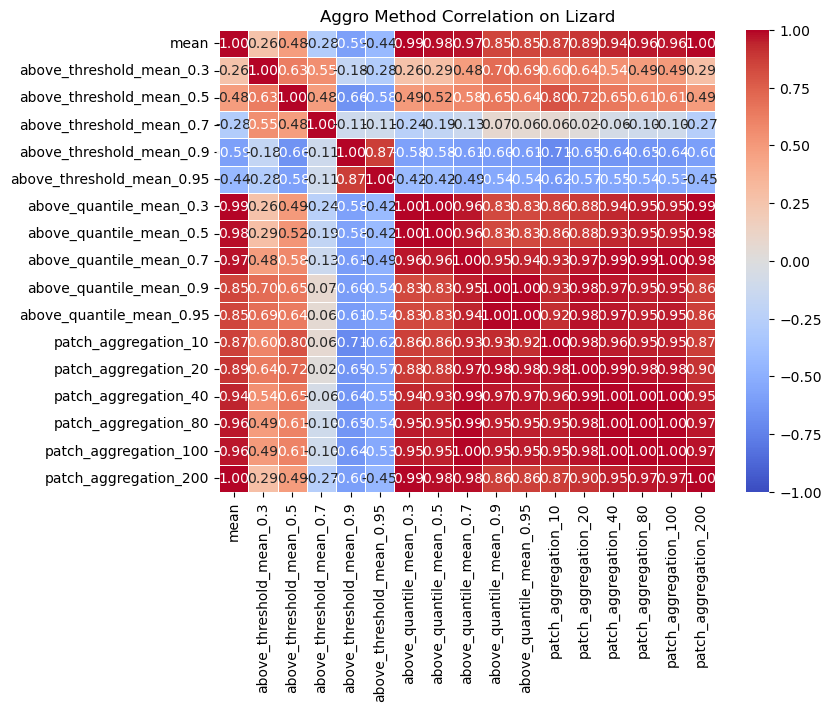

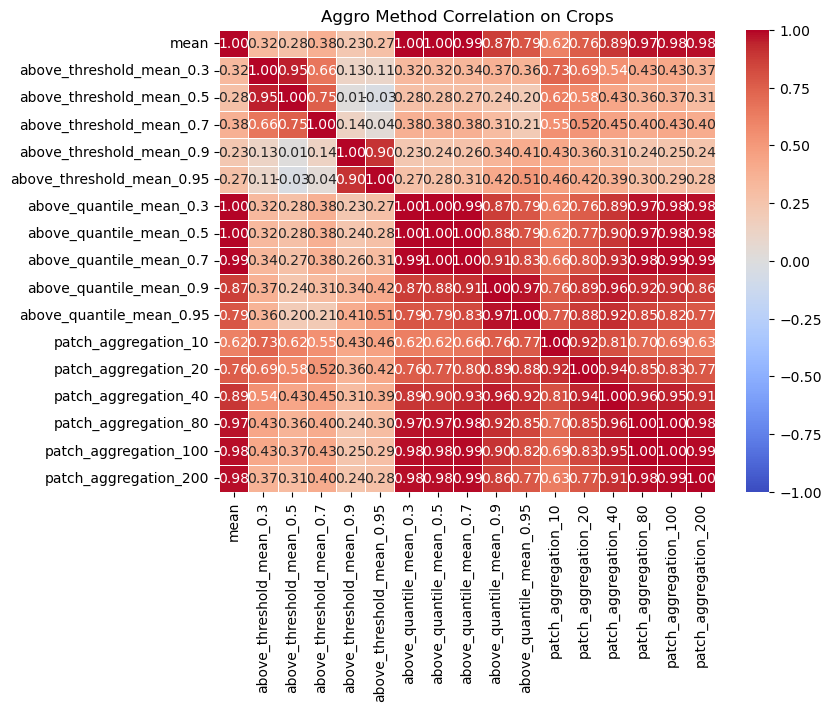

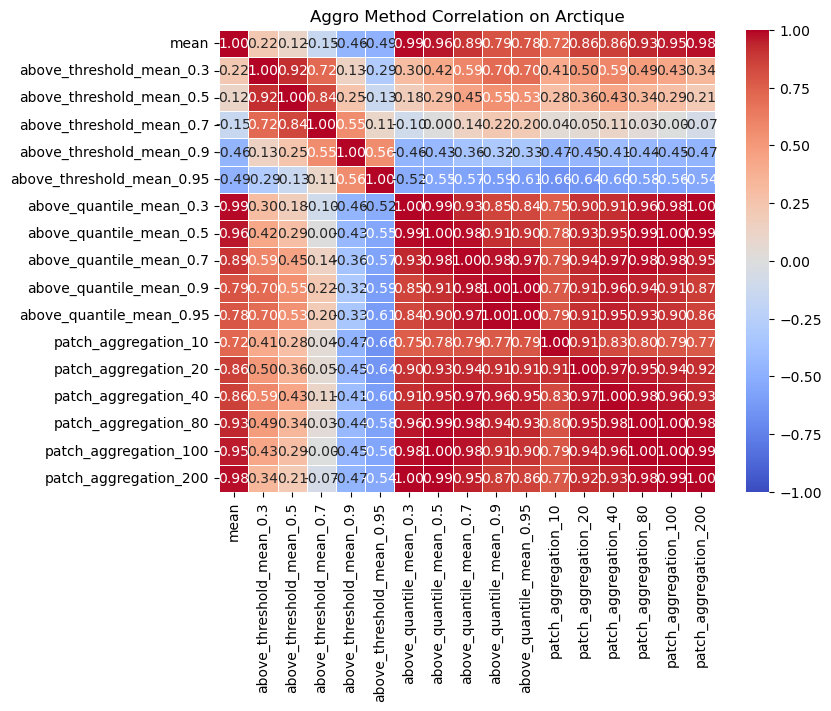

In [140]:
lizard_matrix = plot_correlation_matrix(lizard_df, "Aggro Method Correlation on Lizard")
crop_matrix = plot_correlation_matrix(crops_df, "Aggro Method Correlation on Crops")
arctique_matrix = plot_correlation_matrix(arctique_df, "Aggro Method Correlation on Arctique")


In [ ]:
def get_data(dataset, strategies):
    arrays, filenames = get_slice_arrays(slice=25, dataset=dataset)
    maps = [UncertaintyMap(array=array, mask=None, name=name) for array, name in zip(arrays, filenames)]

    summary = AggregationSummary(strategies, name=dataset, num_cpus=12)
    return summary.apply_methods(maps, save_to_excel=False, do_plot=False, max_value=1.0)


def plot_correlations(datasets, strategies, colorbox=False):
    dfs = [get_data(dataset, strategies) for dataset in datasets]
    corr_matrices = {dataset : df[df.columns.tolist()[1:]].T.corr() for df, dataset in zip(dfs, datasets)}

    N = len(corr_matrices)  # Number of matrices
    fig, axes = plt.subplots(1, N, figsize=(10 * N, 10))  # Create horizontal subplots

    if N == 1:
        axes = [axes]  # Ensure axes is iterable if only one matrix

    for i, (ax, dataset) in enumerate(zip(axes, datasets)):
        strategy_names = [df["Name"].tolist() for df in dfs]
        sns.heatmap(corr_matrices[dataset], ax=ax, cmap="coolwarm", annot=False, fmt=".2f", cbar=True, vmin=-1, vmax=1,
                    xticklabels=strategy_names[i])
        ax.set_yticks([])
        ax.set_title(f"{dataset}: Method correlation")

        if colorbox:
            # unique_groups = list(dict.fromkeys(groups))  # Get unique groups in order
            # group_colors = ["#FFD700", "#87CEEB", "#90EE90"]  # Colors for each group (Yellow, Sky Blue, Green)
            # # Apply background color to x-tick labels
            # for tick, label in zip(ax.get_xticklabels(), groups):
            #     tick.set_bbox(dict(facecolor=group_colors[unique_groups.index(label)], edgecolor='none', alpha=0.5, boxstyle="round,pad=0.3"))
            #         # Apply background color to x-tick labels
            color_code = {
                "threshold" : "red",
                "quantile" : "green",
                "patch" : "blue"
            }
            for tick in ax.get_xticklabels():
                strategy_name = tick.get_text()
                color = next((color_code[key] for key in color_code if key in strategy_name), "black")
                tick.set_bbox(dict(facecolor=color, edgecolor='none', alpha=0.5, boxstyle="round,pad=0.3"))
        

    plt.tight_layout()
    plt.show()
    return corr_matrices

Using 8 CPUs.
Using 8 CPUs.
Using 8 CPUs.


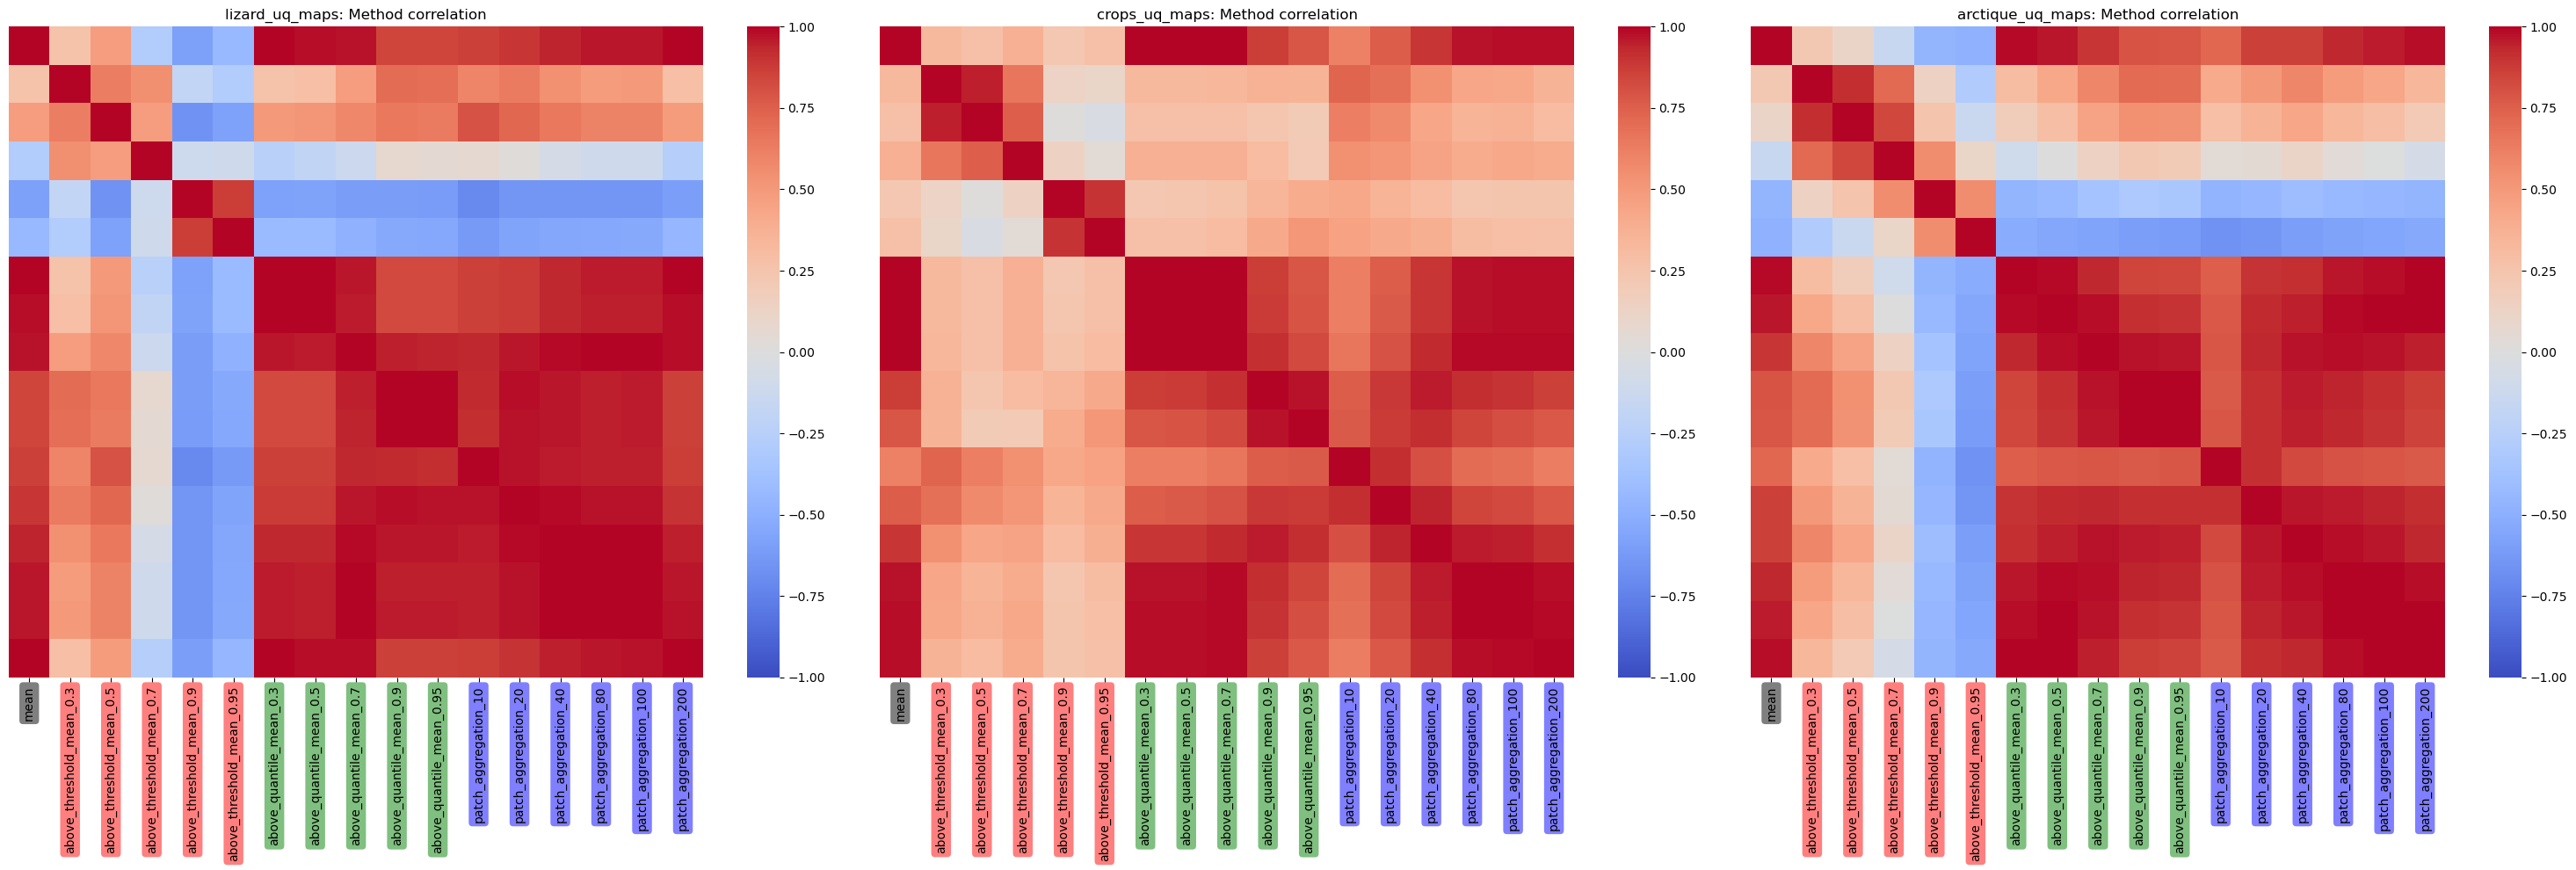

True

In [142]:
# Plot correlation of given datasets and strategy list next to one


datasets = ["lizard_uq_maps", "crops_uq_maps", "arctique_uq_maps"]

plot_correlations(datasets, focus_strategy_list, colorbox=True)
True

## Above-Threshold Anomaly

ATA is not monotonic, which can be seen in the correlation heatmap but also below in the scatterplots.

In [126]:
thresh07 = lizard_df[lizard_df["Name"]=="above_threshold_mean_0.7"][lizard_filenames].values[0]
thresh09 = lizard_df[lizard_df["Name"]=="above_threshold_mean_0.9"][lizard_filenames].values[0]
thresh095 = lizard_df[lizard_df["Name"]=="above_threshold_mean_0.95"][lizard_filenames].values[0]
mean = lizard_df[lizard_df["Name"]=="mean"][lizard_filenames].values[0]

In [151]:
import numpy as np
import matplotlib.pyplot as plt

def get_thresh_values(df, filenames):
    thresh07 = df[df["Name"]=="above_threshold_mean_0.7"][filenames].values[0]
    thresh09 = df[df["Name"]=="above_threshold_mean_0.9"][filenames].values[0]
    thresh095 = df[df["Name"]=="above_threshold_mean_0.95"][filenames].values[0]
    mean = df[df["Name"]=="mean"][filenames].values[0]
    return mean, thresh07, thresh09, thresh095

def plot_values_by_ordered_mean(mean, thresh07, thresh09, thresh095):
    # Get sorted indices based on mean values
    sorted_indices = np.argsort(mean)

    # Reorder all arrays using the new index order
    mean_sorted = mean[sorted_indices]
    thresh07_sorted = thresh07[sorted_indices]
    thresh09_sorted = thresh09[sorted_indices]
    thresh095_sorted = thresh095[sorted_indices]


    # Plot the ordered values
    plt.figure(figsize=(10, 5))
    plt.plot(mean_sorted, label="Mean", linestyle="-")
    plt.plot(thresh07_sorted, label="Threshold 0.7", linestyle="-")
    plt.plot(thresh09_sorted, label="Threshold 0.9", linestyle="-")
    plt.plot(thresh095_sorted, label="Threshold 0.95", linestyle="-")

    plt.xlabel("Heatmap Index (Sorted by Mean - Ascending)")
    plt.xticks(range(len(mean_sorted)))
    plt.ylabel("Value")
    plt.title("Ordered Mean and Threshold Comparisons")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_point_clouds(mean, thresh07, thresh09, thresh095):
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(mean, thresh07, color='green', alpha=0.7)
    plt.scatter(mean, thresh09, color='blue', alpha=0.7)
    plt.scatter(mean, thresh095, color='red', alpha=0.7)

    # Set axis labels and title
    plt.xlabel("Mean Values")
    plt.ylabel("Threshold Values")
    plt.title("Scatter Plot of Mean vs Threshold")

    # Set axis limits based on min and max values
    plt.xlim(min(mean) - 0.05, max(mean) + 0.05)
    min_thresh = min( min(thresh07), min(thresh09), min(thresh095) )
    max_thresh = max( max(thresh07), max(thresh09), max(thresh095) )
    plt.ylim(min_thresh - 0.05, max_thresh + 0.05)

    # Show grid
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show the plot
    plt.show()


def show_correlation_details(df, filenames):
    mean, thresh07, thresh09, thresh095 = get_thresh_values(df, filenames)
    #plot_values_by_ordered_mean(mean, thresh07, thresh09, thresh095)
    plot_point_clouds(mean, thresh07, thresh09, thresh095)

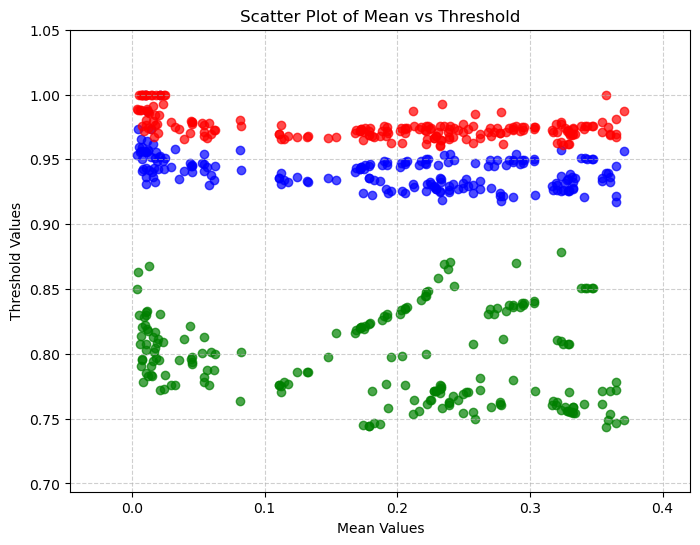

In [152]:
show_correlation_details(arctique_df, arctique_filenames)

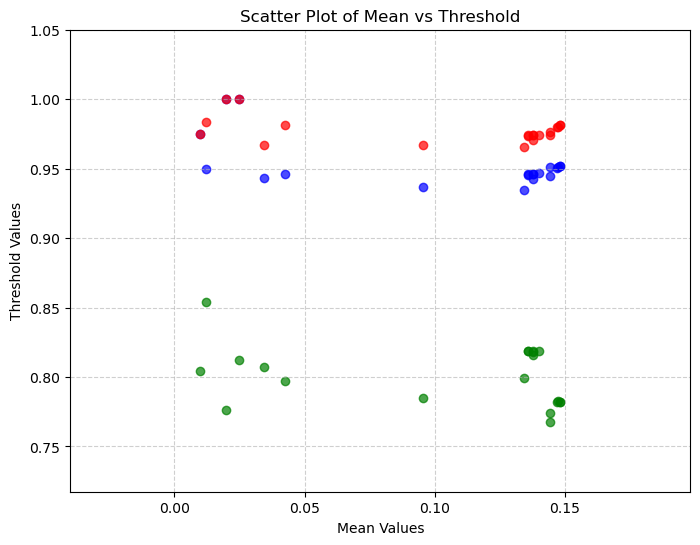

In [153]:
show_correlation_details(lizard_df, lizard_filenames)

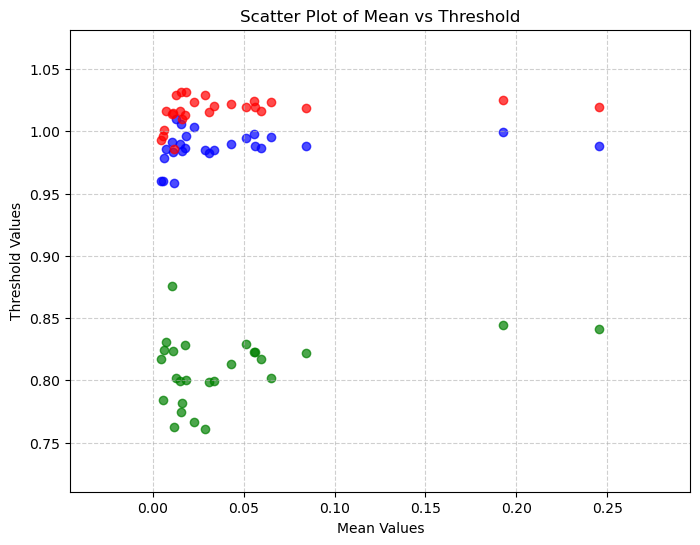

In [154]:
show_correlation_details(crops_df, crops_filenames)

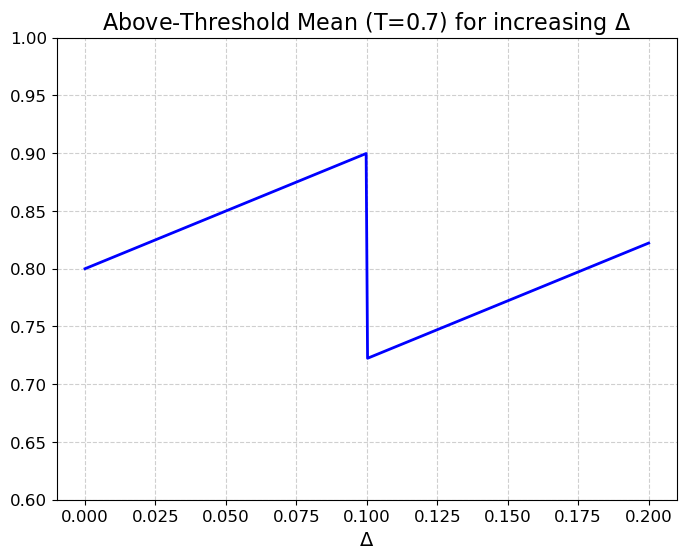

In [170]:
import numpy as np
import matplotlib.pyplot as plt

def piecewise_function(delta):
    """Returns the piecewise function values based on delta (t)."""
    return np.where(delta <= 0.1, 0.8 + delta, (0.8+8*0.6)/9 + delta)

# Define the range of delta (t)
delta_values = np.linspace(0, 0.2, 400)

# Compute function values
y_values = piecewise_function(delta_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(delta_values, y_values, label=r"$f(\Delta)$", color='blue', linewidth=2)

# Labels and title using LaTeX formatting
plt.xlabel(r"$\Delta$", fontsize=14)  # Delta symbol for x-axis
#plt.ylabel(r"$f(\Delta)$", fontsize=14)  # Function notation with Delta
plt.title("Above-Threshold Mean (T=0.7) for increasing $\Delta$", fontsize=16)

# Customizing tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.6, 1.0)

# Adding grid for readability
plt.grid(True, linestyle="--", alpha=0.6)

# Adding a legend
#plt.legend(fontsize=12, loc="upper left")

# Show the plot
plt.show()


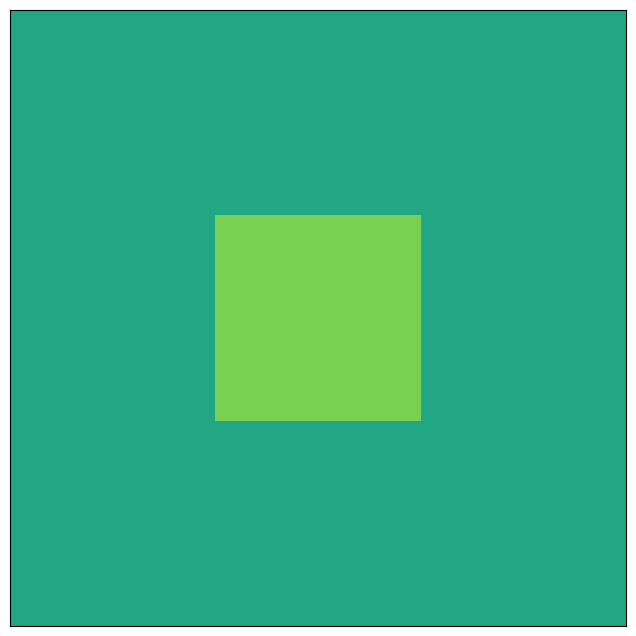

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size
grid_size = 99

# Define the tile size
tile_size = grid_size // 3  # Since we have a 3x3 grid of tiles

# Create a 99x99 array filled with 0.6
heatmap = np.full((grid_size, grid_size), 0.6)

# Set the middle tile (center 33x33 region) to 0.8
heatmap[tile_size:2*tile_size, tile_size:2*tile_size] = 0.8

# Plot the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(heatmap, cmap='viridis', interpolation='nearest',vmin=0, vmax=1)

# Add colorbar
#plt.colorbar(label="Value")

# Remove axis ticks for a cleaner look
plt.xticks([])
plt.yticks([])

# Title
#plt.title("Heatmap with 9 Tiles (Center = 0.8, Others = 0.6)")

# Show the plot
plt.show()


In [113]:
# # Crop lizard dataset into smaller images of various sizes
# dataset="lizard"
# path = os.path.join(os.getcwd(), 'data', f"{dataset}_uq_maps")

# n = len(os.listdir(path))
# shape = np.load(os.path.join(path, os.listdir(path)[0])).shape
# print(n, shape)

# slices = [25, 75, 125]
# crop_shapes = [(50, 50), (100, 100), (150, 150)]

# for file in os.listdir(path):
#     img = np.load(os.path.join(path, file))
#     for slice in slices:
#         for crop_shape in crop_shapes:
#             sliced_img = img[slice, :crop_shape[0], :crop_shape[1]]
#             # Save cropped image
#             np.save(os.path.join(os.getcwd(), 'data', f"{dataset}_uq_maps_cropped", f"{file}_{slice}_{crop_shape[0]}_{crop_shape[1]}.npy"), sliced_img)

In [ ]:
# # Crop crops dataset into smaller images of various sizes
# dataset="crops"
# path = os.path.join(os.getcwd(), 'data', f"{dataset}_uq_maps")

# n = len(os.listdir(path))
# shape = np.load(os.path.join(path, os.listdir(path)[0])).shape
# print(n, shape)

# crop_shapes = [(50, 50), (100, 100), (150, 150)]

# # for file in os.listdir(path):
# #     img = np.load(os.path.join(path, file))
# #     for slice in slices:
# #         for crop_shape in crop_shapes:
# #             sliced_img = img[slice, :crop_shape[0], :crop_shape[1]]
# #             # Save cropped image
# #             np.save(os.path.join(os.getcwd(), 'data', f"{dataset}_uq_maps_cropped", f"{file}_{slice}_{crop_shape[0]}_{crop_shape[1]}.npy"), sliced_img)

26 (600, 600)


## Plot example heatmaps

In [115]:
import random
import matplotlib.pyplot as plt

# Function to plot Lizard dataset arrays as images
def plot_arrays(arrays, n=1):
    """
    Plots the first n elements of an array list as images.
    
    :param arrays: List of NumPy arrays or similar objects.
    :param n: Number of images to display.
    """
    num_plots = min(n, len(arrays))  # Ensure we do not exceed available arrays
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 10, 10))

    if num_plots == 1:
        axes = [axes]  # Ensure iterable for a single subplot

    # randomize index selection for arrays
    indices = list(range(len(arrays)))
    random.shuffle(indices)
    indices = indices[:num_plots]
    for i, array in enumerate([arrays[j] for j in indices]):
        # Display the array as an image using viridis colormap
        axes[i].imshow(array, cmap='viridis')
        
        # Set title if the array has a name attribute
        if hasattr(array, "name"):
            axes[i].set_title(array.name)
        
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    plt.tight_layout()
    return fig, axes


(<Figure size 1000x1000 with 1 Axes>, [<Axes: >])

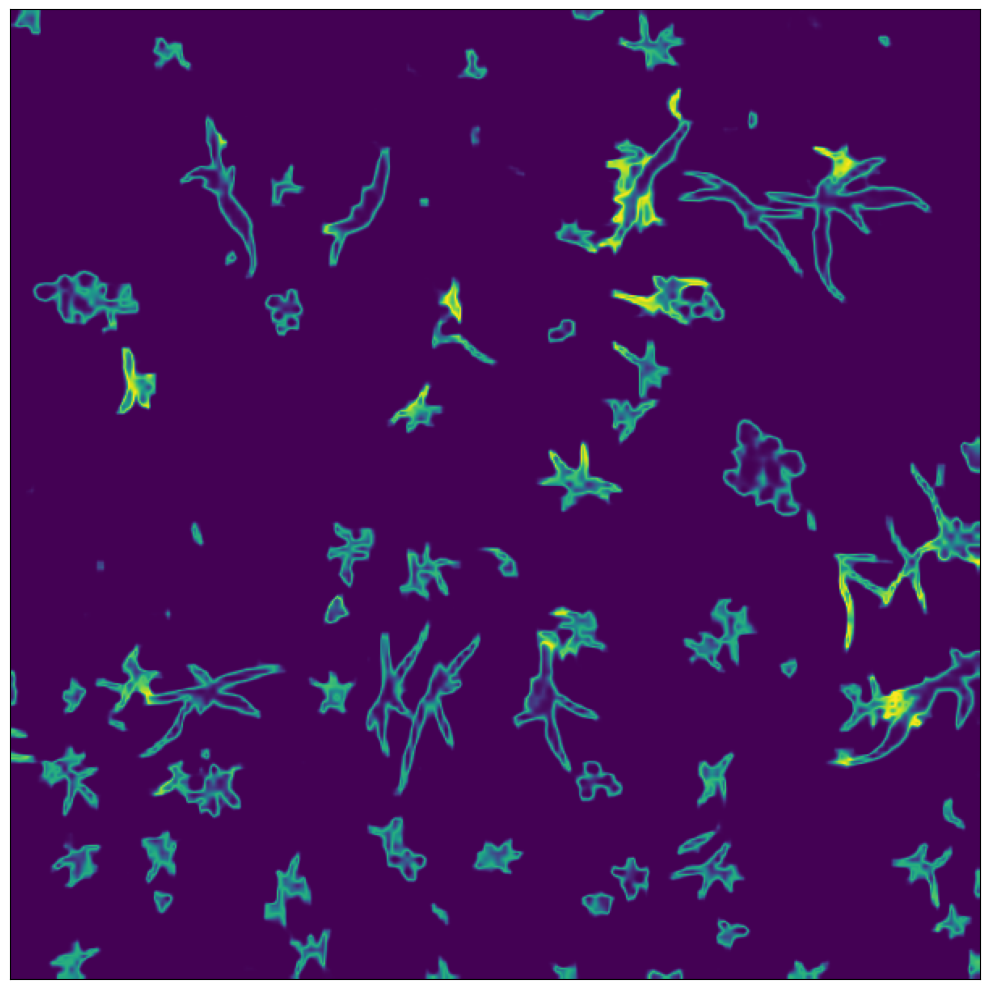

In [116]:
plot_arrays(crops_arrays, 1)